In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('Iris.csv')

In [4]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
ds=ds.drop(columns=['Id'])

In [6]:
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
ds['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
#PRE-PROCESSING THE DATA
ds.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
#DATA ANALYSIS(VISUALISTATION)

<AxesSubplot:>

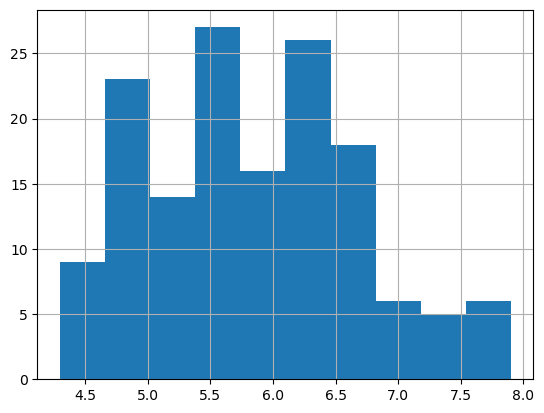

In [11]:
#HISTOGRAMS
ds['SepalLengthCm'].hist()

<AxesSubplot:>

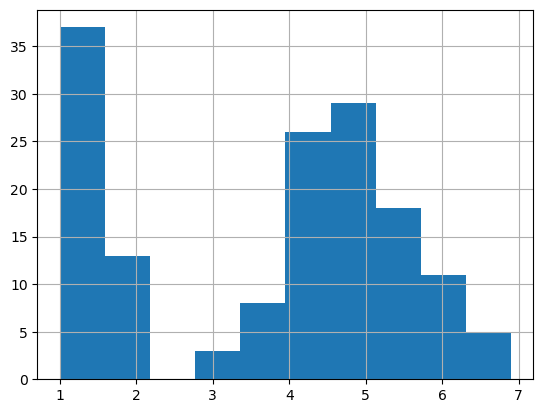

In [12]:
ds['PetalLengthCm'].hist()

<AxesSubplot:>

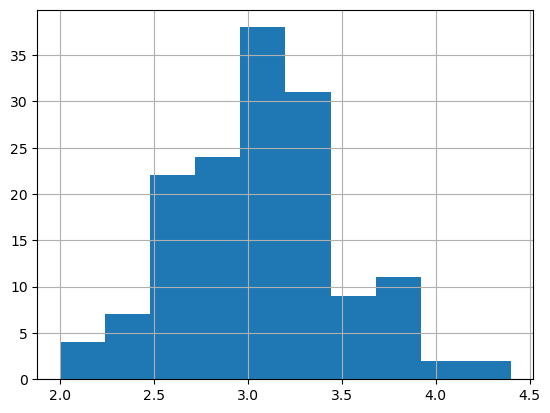

In [13]:
ds['SepalWidthCm'].hist()

<AxesSubplot:>

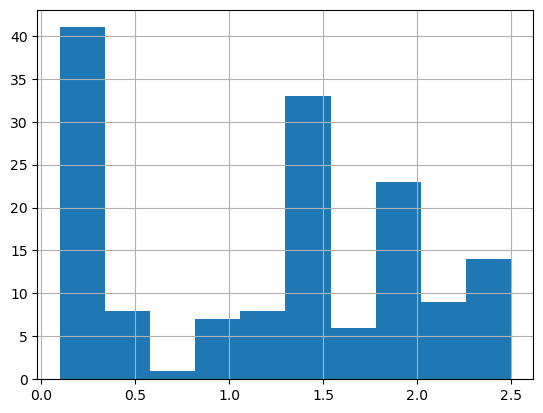

In [14]:
ds['PetalWidthCm'].hist()

In [15]:
#SCATTERPLOT
colors=['brown','blue','orange']
species=['Iris-setosa' , 'Iris-versicolor','Iris-virginica']

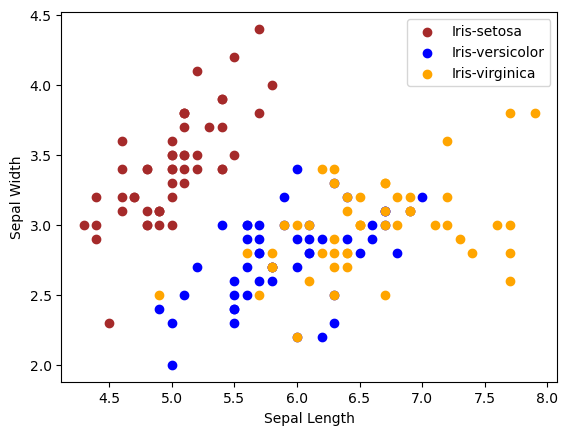

In [16]:
for i in range(3):
    x=ds[ds['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

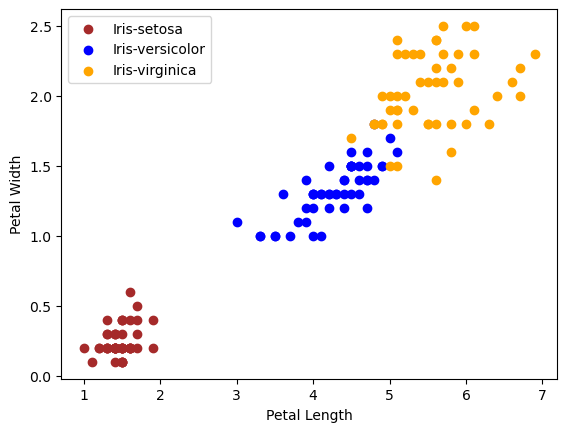

In [17]:
for i in range(3):
    x=ds[ds['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

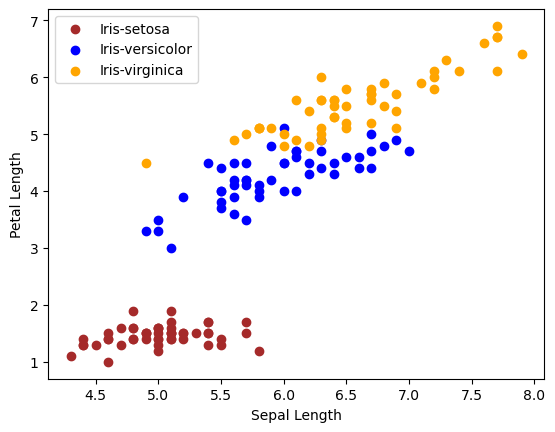

In [18]:
for i in range(3):
    x=ds[ds['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

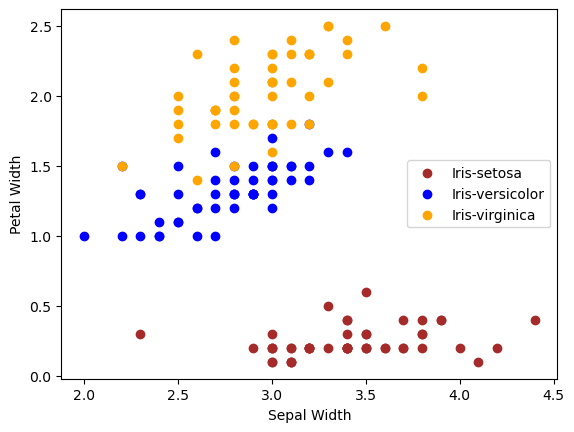

In [19]:
for i in range(3):
    x=ds[ds['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [20]:
#CORRELATIONMATRIX
ds.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

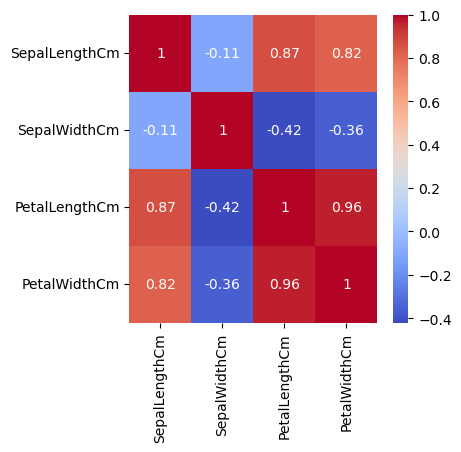

In [21]:
corr=ds.corr()
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
ds['Species']=le.fit_transform(ds['Species'])
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
#MODEL TRAIN
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=ds.drop(columns=['Species'])
Y=ds['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [25]:
#USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
print("ACCURACY : ",model.score(x_test,y_test)*100)

ACCURACY :  93.33333333333333


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [29]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [30]:
print("ACCURACY : ",model.score(x_test,y_test)*100)

ACCURACY :  95.55555555555556


c:\Users\prasad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
